# 音频频谱图Transformer

## 概述

Audio Spectrogram Transformer 模型是由 Yuan Kong、Yu-An Chung、James Glass在AST: Audio Spectrogram Transformer中提出的。音频频谱图转换器将视觉转换器应用于音频，将音频转换为图像（频谱图）。该模型获得了最先进的音频分类结果。

论文摘要如下：

在过去的十年中，卷积神经网络（CNN）已被广泛采用作为端到端音频分类模型的主要构建块，其目的是学习从音频频谱图到相应标签的直接映射。为了更好地捕获远程全局上下文，最近的趋势是在 CNN 之上添加自注意力机制，形成 CNN-注意力混合模型。然而，目前尚不清楚是否有必要依赖 CNN，以及纯粹基于注意力的神经网络是否足以在音频分类中获得良好的性能。在本文中，我们通过引入音频频谱图变换器（AST）来回答这个问题，这是第一个无卷积、纯粹基于注意力的音频分类模型。我们在各种音频分类基准上评估 AST，

Tips:
在您自己的数据集上微调音频频谱图转换器 (AST) 时，建议注意输入标准化（以确保输入的平均值为 0，标准差为 0.5）。ASTFeatureExtractor负责处理这个问题。请注意，它默认使用 AudioSet 平均值和标准差。您可以检查ast/src/get_norm_stats.py作者如何计算下游数据集的统计数据。
请注意，AST 需要较低的学习率（与PSLA 论文中提出的 CNN 模型相比，作者使用的学习率小 10 倍 ）并且收敛速度很快，因此请为您的任务搜索合适的学习率和学习率调度器。

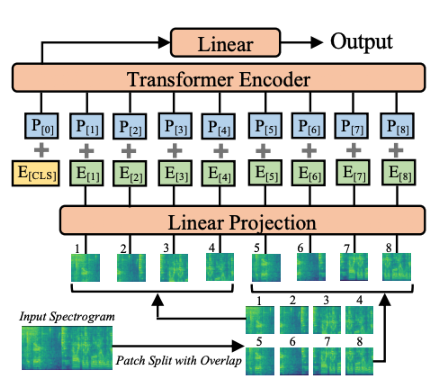

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic = mpimg.imread('images/4.5audio_spectogram_transformer_architecture.png')
pic.shape
plt.imshow(pic)
plt.axis('off') 
plt.show()

## 资源

官方 Hugging Face 和社区（由 🌎 表示）资源列表可帮助您开始使用音频频谱图转换器。

音频分类
可以在此处找到说明使用 AST 进行音频分类推理的笔记本。

此示例脚本和笔记本支持ASTForAudioClassification。

另请参阅：音频分类。

如果您有兴趣提交要包含在此处的资源，请随时打开 Pull 请求，我们将对其进行审核！理想情况下，资源应该展示新的东西，而不是重复现有的资源。

## ASTConfig

### Parameters


    hidden_size (int, optional, defaults to 768) — Dimensionality of the encoder layers and the pooler layer.

    num_hidden_layers (int, optional, defaults to 12) — Number of hidden layers in the Transformer encoder.

    num_attention_heads (int, optional, defaults to 12) — Number of attention heads for each attention layer in the Transformer encoder.

    intermediate_size (int, optional, defaults to 3072) — Dimensionality of the “intermediate” (i.e., feed-forward) layer in the Transformer encoder.

    hidden_act (str or function, optional, defaults to "gelu") — The non-linear activation function (function or string) in the encoder and pooler. If string, "gelu", "relu", "selu" and "gelu_new" are supported.

    hidden_dropout_prob (float, optional, defaults to 0.1) — The dropout probability for all fully connected layers in the embeddings, encoder, and pooler.

    attention_probs_dropout_prob (float, optional, defaults to 0.1) — The dropout ratio for the attention probabilities.

    initializer_range (float, optional, defaults to 0.02) — The standard deviation of the truncated_normal_initializer for initializing all weight matrices.

    layer_norm_eps (float, optional, defaults to 1e-12) — The epsilon used by the layer normalization layers.

    patch_size (int, optional, defaults to 16) — The size (resolution) of each patch.

    qkv_bias (bool, optional, defaults to True) — Whether to add a bias to the queries, keys and values.

    frequency_stride (int, optional, defaults to 10) — Frequency stride to use when patchifying the spectrograms.

    time_stride (int, optional, defaults to 10) — Temporal stride to use when patchifying the spectrograms.

    max_length (int, optional, defaults to 1024) — Temporal dimension of the spectrograms.

    num_mel_bins (int, optional, defaults to 128) — Frequency dimension of the spectrograms (number of Mel-frequency bins).

这是存储ASTModel配置的配置类。它用于根据指定的参数实例化 AST 模型，定义模型架构。使用默认值实例化配置将产生与 AST MIT/ast-finetuned-audioset-10-10-0.4593 架构类似的配置。

配置对象继承自PretrainedConfig，可用于控制模型输出。阅读PretrainedConfig的文档以获取更多信息。

### Example

In [1]:
from transformers import ASTConfig, ASTModel

# Initializing a AST MIT/ast-finetuned-audioset-10-10-0.4593 style configuration
configuration = ASTConfig()

# Initializing a model (with random weights) from the MIT/ast-finetuned-audioset-10-10-0.4593 style configuration
model = ASTModel(configuration)

# Accessing the model configuration
configuration = model.config

## ASTFeatureExtractor

### class transformers.ASTFeatureExtractor

    feature_size (int, optional, defaults to 1) — The feature dimension of the extracted features.

    sampling_rate (int, optional, defaults to 16000) — The sampling rate at which the audio files should be digitalized expressed in hertz (Hz).

    num_mel_bins (int, optional, defaults to 128) — Number of Mel-frequency bins.

    max_length (int, optional, defaults to 1024) — Maximum length to which to pad/truncate the extracted features.

    do_normalize (bool, optional, defaults to True) — Whether or not to normalize the log-Mel features using mean and std.

    mean (float, optional, defaults to -4.2677393) — The mean value used to normalize the log-Mel features. Uses the AudioSet mean by default.

    std (float, optional, defaults to 4.5689974) — The standard deviation value used to normalize the log-Mel features. Uses the AudioSet standard deviation by default.

    eturn_attention_mask (bool, optional, defaults to False) — Whether or not call() should return attention_mask.

构造音频频谱图变换器 (AST) 特征提取器。

该特征提取器继承自SequenceFeatureExtractor，其中包含大部分主要方法。用户应参考此超类以获取有关这些方法的更多信息。

此类使用 TorchAudio 从原始语音中提取梅尔滤波器组特征，将它们填充/截断为固定长度，并使用平均值和标准差将它们标准化。

### __call__

    raw_speech (np.ndarray, List[float], List[np.ndarray], List[List[float]]) — The sequence or batch of sequences to be padded. Each sequence can be a numpy array, a list of float values, a list of numpy arrays or a list of list of float values. Must be mono channel audio, not stereo, i.e. single float per timestep.

    sampling_rate (int, optional) — The sampling rate at which the raw_speech input was sampled. It is strongly recommended to pass sampling_rate at the forward call to prevent silent errors.

    return_tensors (str or TensorType, optional) — If set, will return tensors instead of list of python integers. Acceptable values are:

        'tf': Return TensorFlow tf.constant objects.
        'pt': Return PyTorch torch.Tensor objects.
        'np': Return Numpy np.ndarray objects.

Main method to featurize and prepare for the model one or several sequence(s).

## ASTModel

### class transformers.ASTModel


    config (ASTConfig) — Model configuration class with all the parameters of the model. Initializing with a config file does not load the weights associated with the model, only the configuration. Check out the from_pretrained() method to load the model weights.

The bare AST Model transformer outputting raw hidden-states without any specific head on top. This model is a PyTorch torch.nn.Module subclass. Use it as a regular PyTorch Module and refer to the PyTorch documentation for all matter related to general usage and behavior.

### forward


    input_values (torch.FloatTensor of shape (batch_size, max_length, num_mel_bins)) — Float values mel features extracted from the raw audio waveform. Raw audio waveform can be obtained by loading a .flac or .wav audio file into an array of type List[float] or a numpy.ndarray, e.g. via the soundfile library (pip install soundfile). To prepare the array into input_features, the AutoFeatureExtractor should be used for extracting the mel features, padding and conversion into a tensor of type torch.FloatTensor. See call()

    head_mask (torch.FloatTensor of shape (num_heads,) or (num_layers, num_heads), optional) — Mask to nullify selected heads of the self-attention modules. Mask values selected in [0, 1]:
        1 indicates the head is not masked,
        0 indicates the head is masked.

    output_attentions (bool, optional) — Whether or not to return the attentions tensors of all attention layers. See attentions under returned tensors for more detail.

    output_hidden_states (bool, optional) — Whether or not to return the hidden states of all layers. See hidden_states under returned tensors for more detail.

    return_dict (bool, optional) — Whether or not to return a ModelOutput instead of a plain tuple.

Returns

transformers.modeling_outputs.BaseModelOutputWithPooling or tuple(torch.FloatTensor)



A transformers.modeling_outputs.BaseModelOutputWithPooling or a tuple of torch.FloatTensor (if return_dict=False is passed or when config.return_dict=False) comprising various elements depending on the configuration (ASTConfig) and inputs.

    last_hidden_state (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size)) — Sequence of hidden-states at the output of the last layer of the model.

    pooler_output (torch.FloatTensor of shape (batch_size, hidden_size)) — Last layer hidden-state of the first token of the sequence (classification token) after further processing through the layers used for the auxiliary pretraining task. E.g. for BERT-family of models, this returns the classification token after processing through a linear layer and a tanh activation function. The linear layer weights are trained from the next sentence prediction (classification) objective during pretraining.

    hidden_states (tuple(torch.FloatTensor), optional, returned when output_hidden_states=True is passed or when config.output_hidden_states=True) — Tuple of torch.FloatTensor (one for the output of the embeddings, if the model has an embedding layer, + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).

    Hidden-states of the model at the output of each layer plus the optional initial embedding outputs.

    attentions (tuple(torch.FloatTensor), optional, returned when output_attentions=True is passed or when config.output_attentions=True) — Tuple of torch.FloatTensor (one for each layer) of shape (batch_size, num_heads, sequence_length, sequence_length).

    注意力权重位于注意力softmax之后，用于计算自注意力头中的加权平均值。

ASTModel前向方法覆盖特殊方法__call__。



<font color=GreenYellow>尽管需要在此函数中定义前向传递的配方，但应该Module 在之后调用实例而不是此函数，因为前者负责运行预处理和后处理步骤，而后者则默默地忽略它们。</font>

### Example

In [ ]:
from transformers import AutoProcessor, ASTModel
import torch
from datasets import load_dataset

dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

processor = AutoProcessor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# audio file is decoded on the fly
inputs = processor(dataset[0]["audio"]["array"], sampling_rate=sampling_rate, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

## ASTForAudioClassification

### class transformers.ASTForAudioClassification

    config ( ASTConfig ) — 包含模型所有参数的模型配置类。使用配置文件初始化不会加载与模型关联的权重，仅加载配置。查看 from_pretrained()方法来加载模型权重。

音频频谱图变换器模型，顶部有一个音频分类头（池化输出顶部的线性层），例如用于 AudioSet、Speech Commands v2 等数据集。

该模型是 PyTorch torch.nn.Module子类。将其用作常规 PyTorch 模块，并参阅 PyTorch 文档以了解与一般用法和行为相关的所有事项。

### forward

Parameters

    input_values (torch.FloatTensor of shape (batch_size, max_length, num_mel_bins)) — Float values mel features extracted from the raw audio waveform. Raw audio waveform can be obtained by loading a .flac or .wav audio file into an array of type List[float] or a numpy.ndarray, e.g. via the soundfile library (pip install soundfile). To prepare the array into input_features, the AutoFeatureExtractor should be used for extracting the mel features, padding and conversion into a tensor of type torch.FloatTensor. See call()

    head_mask (torch.FloatTensor of shape (num_heads,) or (num_layers, num_heads), optional) — Mask to nullify selected heads of the self-attention modules. Mask values selected in [0, 1]:
        1 indicates the head is not masked,
        0 indicates the head is masked.

    output_attentions (bool, optional) — Whether or not to return the attentions tensors of all attention layers. See attentions under returned tensors for more detail.

    output_hidden_states (bool, optional) — Whether or not to return the hidden states of all layers. See hidden_states under returned tensors for more detail.

    return_dict (bool, optional) — Whether or not to return a ModelOutput instead of a plain tuple.

    labels (torch.LongTensor of shape (batch_size,), optional) — Labels for computing the audio classification/regression loss. Indices should be in [0, ..., config.num_labels - 1]. If config.num_labels == 1 a regression loss is computed (Mean-Square loss), If config.num_labels > 1 a classification loss is computed (Cross-Entropy).

Returns

transformers.modeling_outputs.SequenceClassifierOutput or tuple(torch.FloatTensor)

A transformers.modeling_outputs.SequenceClassifierOutput or a tuple of torch.FloatTensor (if return_dict=False is passed or when config.return_dict=False) comprising various elements depending on the configuration (ASTConfig) and inputs.

    loss (torch.FloatTensor of shape (1,), optional, returned when labels is provided) — Classification (or regression if config.num_labels==1) loss.

    logits (torch.FloatTensor of shape (batch_size, config.num_labels)) — Classification (or regression if config.num_labels==1) scores (before SoftMax).

    hidden_states (tuple(torch.FloatTensor), optional, returned when output_hidden_states=True is passed or when config.output_hidden_states=True) — Tuple of torch.FloatTensor (one for the output of the embeddings, if the model has an embedding layer, + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).

    Hidden-states of the model at the output of each layer plus the optional initial embedding outputs.

    attentions (tuple(torch.FloatTensor), optional, returned when output_attentions=True is passed or when config.output_attentions=True) — Tuple of torch.FloatTensor (one for each layer) of shape (batch_size, num_heads, sequence_length, sequence_length).

    Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.

The ASTForAudioClassification forward method, overrides the __call__ special method.

<font color=GreenYellow>尽管需要在此函数中定义前向传递的配方，但应该Module 在之后调用实例而不是此函数，因为前者负责运行预处理和后处理步骤，而后者则默默地忽略它们。</font>

### Example

In [ ]:
from transformers import AutoFeatureExtractor, ASTForAudioClassification
from datasets import load_dataset
import torch

dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# audio file is decoded on the fly
inputs = feature_extractor(dataset[0]["audio"]["array"], sampling_rate=sampling_rate, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.argmax(logits, dim=-1).item()
predicted_label = model.config.id2label[predicted_class_ids]
predicted_label

# compute loss - target_label is e.g. "down"
target_label = model.config.id2label[0]
inputs["labels"] = torch.tensor([model.config.label2id[target_label]])
loss = model(**inputs).loss
round(loss.item(), 2)

## Inference_with_the_Audio_Spectogram_Transformer_to_classify_audio

### Set-up environment

First we install 🤗 Transformers.

!pip install -q git+https://github.com/huggingface/transformers.git

### Load audio

Let's load some audio on which we'd like to test the model.

In [1]:
from huggingface_hub import hf_hub_download
import IPython

filepath = hf_hub_download(repo_id="nielsr/audio-spectogram-transformer-checkpoint",
                           filename="sample_audio.flac",
                           repo_type="dataset")

IPython.display.Audio(filepath)

### Prepare audio for the model (using feature extractor)

We can prepare the audio using ASTFeatureExtractor, which turns it into a tensor of shape (batch_size, time_dimension, frequency_dimension). This is also known as a spectrogram.

In [2]:
from transformers import ASTFeatureExtractor

feature_extractor = ASTFeatureExtractor()

import torchaudio

waveform, sampling_rate = torchaudio.load(filepath)
waveform = waveform.squeeze().numpy()

waveform.shape

inputs = feature_extractor(waveform, sampling_rate=sampling_rate, padding="max_length", return_tensors="pt")
input_values = inputs.input_values
print(input_values.shape)

torch.Size([1, 1024, 128])


### Load model

Next we load one of the models that the AST authors released from the hub.

This one was fine-tuned on AudioSet, an important benchmark for audio classification.

In [3]:
from transformers import AutoModelForAudioClassification

model = AutoModelForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

### Forward pass

Next let's forward the audio through the model! We perform an argmax on the model's logits to get the predicted class index. We use model.config.id2label to turn that back into text.

In [4]:
import torch

with torch.no_grad():
  outputs = model(input_values)

predicted_class_idx = outputs.logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Organ


## Audio classification examples

以下示例展示了如何Wav2Vec2使用 PyTorch 微调音频分类。

仅在音频数据上以无监督方式进行预训练的语音识别模型（ 例如 Wav2Vec2、 HuBERT、 XLSR-Wav2Vec2）已证明只需要很少的注释数据即可在语音分类数据集上产生良好的性能。

以下命令展示了如何在SUPERB 数据集的🗣️关键字识别子集上微调wav2vec2-base 。

In [5]:
!python run_audio_classification.py \
    --model_name_or_path facebook/wav2vec2-base \
    --dataset_name superb \
    --dataset_config_name ks \
    --output_dir wav2vec2-base-ft-keyword-spotting \
    --overwrite_output_dir \
    --remove_unused_columns False \
    --do_train \
    --do_eval \
    --fp16 \
    --learning_rate 3e-5 \
    --max_length_seconds 1 \
    --attention_mask False \
    --warmup_ratio 0.1 \
    --num_train_epochs 5 \
    --per_device_train_batch_size 32 \
    --gradient_accumulation_steps 4 \
    --per_device_eval_batch_size 32 \
    --dataloader_num_workers 4 \
    --logging_strategy steps \
    --logging_steps 10 \
    --evaluation_strategy epoch \
    --save_strategy epoch \
    --load_best_model_at_end True \
    --metric_for_best_model accuracy \
    --save_total_limit 3 \
    --seed 0 \
    --push_to_hub

/home/zongxiao/Videos/HFAudio/run_audio_classification.py:190: FutureWarning: The argument `--freeze_feature_extractor` is deprecated and will be removed in a future version. Use `--freeze_feature_encoder`instead. Setting `freeze_feature_encoder==True`.
  warnings.warn(
09/30/2023 17:04:28 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1 distributed training: False, 16-bits training: True
09/30/2023 17:04:28 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=4,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=

colab works much faster